In [1]:
genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()

In [3]:
import pandas as pd 

audio_recording = "/home/lakshya/VIT/Research/TFF_Tutorial/Data/genres_original/pop/pop.00010.wav"
data, sr = librosa.load(audio_recording) 

print(type(data), type(sr))

NameError: name 'librosa' is not defined

In [18]:
data

array([-0.06268311, -0.07568359, -0.08706665, ...,  0.02651978,
        0.00140381, -0.01583862], dtype=float32)

In [19]:
sr

22050

In [22]:
import IPython 
IPython.display.Audio(data, rate=sr) 

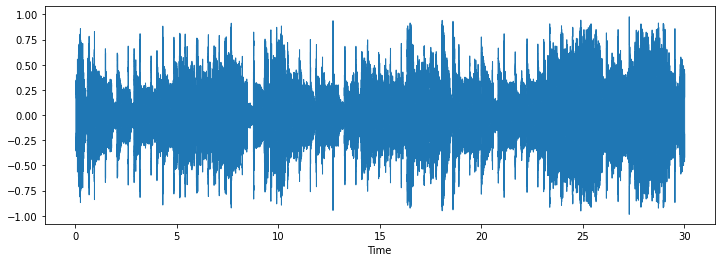

In [26]:
import librosa.display

plt.figure(figsize=(12,4)) 
librosa.display.waveshow(data)
plt.show()

In [28]:
audio_db = pd.read_csv('./Data/features_3_sec.csv') 
audio_db.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Increasing Data

In [31]:
genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()

for g in genres:
    path_audio = os.path.join('./Data/genres_3sec',f'{g}')
    print(path_audio)
    os.makedirs(path_audio)



./Data/genres_3sec/blues
./Data/genres_3sec/classical
./Data/genres_3sec/country
./Data/genres_3sec/disco
./Data/genres_3sec/pop
./Data/genres_3sec/hiphop
./Data/genres_3sec/metal
./Data/genres_3sec/reggae
./Data/genres_3sec/rock


In [33]:
for g in genres:
    path_image = os.path.join('./Data/images_3sec',f'{g}')
    print(path_image)
    os.makedirs(path_image)

./Data/images_3sec/blues
./Data/images_3sec/classical
./Data/images_3sec/country
./Data/images_3sec/disco
./Data/images_3sec/pop
./Data/images_3sec/hiphop
./Data/images_3sec/metal
./Data/images_3sec/reggae
./Data/images_3sec/rock


In [2]:
import os 

genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()

for g in genres:
    path_image = os.path.join('./Data/images_3sec_hamming',f'{g}')
    print(path_image)
    os.makedirs(path_image)

./Data/images_3sec_hamming/blues
./Data/images_3sec_hamming/classical
./Data/images_3sec_hamming/country
./Data/images_3sec_hamming/disco
./Data/images_3sec_hamming/pop
./Data/images_3sec_hamming/hiphop
./Data/images_3sec_hamming/metal
./Data/images_3sec_hamming/reggae
./Data/images_3sec_hamming/rock


In [32]:
# Splitting each audio clips into 3 second clips and separating them in respective genre folders

i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('./Data/genres_original',f"{g}")):

    song  =  os.path.join(f'./Data/genres_original/{g}',f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      #print(i)
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'./Data/genres_3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

blues
classical
country
disco
pop
hiphop
metal
reggae
rock


hiphop


KeyboardInterrupt: 

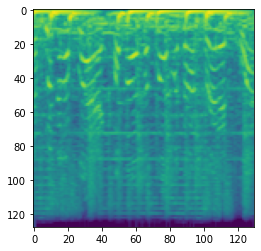

In [15]:
import os 
import librosa 
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import numpy as np

# Making spectograms for each 3 second audio clip 

genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()

for g in genres:
  j = 0
  print(g)
  for filename in os.listdir(os.path.join('./Data/genres_3sec',f"{g}")):
    res = ''
    idx1 = filename.index(g) 
    idx2 = filename.index(".") 
    for idx in range(idx1 + len(g), idx2): 
        res += filename[idx] 
        
#     if(int(res) > 500): 
#         continue 
    
    song  =  os.path.join(f'./Data/genres_3sec/{g}',f'{filename}')
    j = j+1
    
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr, window='hamming')
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'./Data/images_3sec/{g}/{g+str(j)}.png')

### Converting Images into Pixels

In [1]:
import numpy as np 
import pandas as pd 
from random import randint 

In [3]:
files = [] 
labels = [] 

genres = 'blues classical country disco pop hiphop metal reggae rock'
genres = genres.split()

In [4]:
import os 

for genre in genres: 
    for filename in os.listdir(os.path.join('./images_3sec',f"{genre}")):
        labels.append(genre) 
        files.append(filename)

print(len(files))

8858


In [5]:
# Database where we assign client ids from {1,2,3,4,5,6}

NUM_CLIENTS = 10

data = {"file" : files, "client_id": np.random.randint(1,NUM_CLIENTS, len(files)), "label": labels} 
df = pd.DataFrame(data) 

df.head() 

,file,client_id,label
0,blues313.png,7,blues
1,blues475.png,2,blues
2,blues461.png,3,blues
3,blues6.png,3,blues
4,blues307.png,2,blues


In [8]:
#Column for spectrogram pixels

df["pixels"] = " " 


In [6]:
img_pxs = np.empty([len(files),288,432])

In [7]:
from skimage import io 
from skimage.transform import rescale
import matplotlib.pyplot as plt 
import os 

# scaling_factor = 0.25

for genre in genres: 
    for i, filename in enumerate(files):
        img_path = os.path.join(f'./images_3sec/{labels[i]}',f'{filename}') 
        img = io.imread(img_path, as_gray=True)
#         img = rescale(img, scaling_factor,anti_aliasing = False)
        img_pxs[i] = img

In [10]:
np.save('./imagePixelsNew.npy', img_pxs)

In [13]:
df = df.drop(columns=['pixels'])

In [14]:
df.shape

(8858, 3)

In [15]:
df.head()

,file,client_id,label
0,blues409.png,9,blues
1,blues824.png,4,blues
2,blues837.png,7,blues
3,blues588.png,4,blues
4,blues264.png,7,blues


In [16]:
df.to_csv('./pixels_3secNew.csv') 

### Label Encoding 

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 



In [5]:
df = pd.read_csv('./pixels_3secNew.csv', usecols=['file','client_id', 'label']) 
df.shape 

(8858, 3)

In [6]:
img_pxs = np.load('./NewImagePixels2.npy')
img_pxs.shape

(8858, 115, 173)

In [7]:
df['client_id'].value_counts()

8    1035
3    1034
7    1015
1    1001
4     983
9     974
2     970
6     948
5     898
Name: client_id, dtype: int64

In [66]:
df.groupby(['client_id', 'label']).size()

client_id  label    
1          blues        116
           classical    109
           country      118
           disco         94
           hiphop       127
                       ... 
9          hiphop       102
           metal        100
           pop          101
           reggae       116
           rock         117
Length: 81, dtype: int64

In [67]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'pop', 'hiphop', 'metal',
       'reggae', 'rock'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
le.fit(df['label'].unique())

LabelEncoder()

In [14]:
y = le.transform(df['label']) 
y

array([0, 0, 0, ..., 8, 8, 8])

In [8]:
X = img_pxs
X.shape

(8858, 115, 173)

In [10]:
df['client_id'].value_counts()

8    1035
3    1034
7    1015
1    1001
4     983
9     974
2     970
6     948
5     898
Name: client_id, dtype: int64

In [11]:
df['pixels'] = ''
for i in df.index: 
    df.at[i, 'pixels'] = X[i] 

df.head()

,file,client_id,label,pixels
0,blues409.png,8,blues,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,blues824.png,4,blues,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,blues837.png,5,blues,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,blues588.png,8,blues,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,blues264.png,2,blues,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [15]:
df['label_enc'] = le.transform(df['label'].values)
df.tail()

,file,client_id,label,pixels,label_enc
8853,rock518.png,1,rock,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",8
8854,rock636.png,7,rock,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",8
8855,rock381.png,8,rock,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",8
8856,rock493.png,7,rock,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",8
8857,rock153.png,6,rock,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",8


### Converting into Federated Data 

In [16]:
df_fed = df[['client_id', 'pixels', 'label_enc']]
df_fed.head()

,client_id,pixels,label_enc
0,8,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
2,5,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
3,8,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
4,2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0


In [17]:
train_client_ids = [1,2,3,4,5,6] 
test_client_ids = [7,8,9]


In [18]:
import tensorflow as tf 

def create_tf_dataset_for_client_fn(client_id):
  # a function which takes a client_id and returns a
  # tf.data.Dataset for that client
  client_data = df_fed[df_fed['client_id'] == client_id]
  dataset = tf.data.Dataset.from_tensor_slices(client_data.to_dict('list'))
  return dataset

In [19]:
import tensorflow_federated as tff

train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=train_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=test_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

{'client_id': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'pixels': <tf.Tensor: shape=(115, 173), dtype=float64, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])>, 'label_enc': <tf.Tensor: shape=(), dtype=int32, numpy=0>}
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(115, 173)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


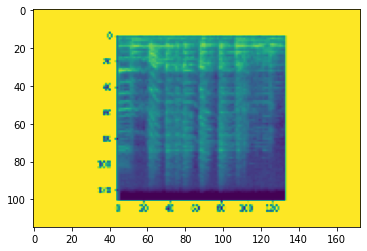

In [20]:
example_dataset = train_data.create_tf_dataset_for_client(
        train_data.client_ids[0]
    )
example_element = iter(example_dataset).next()
print(example_element)
print(example_element['pixels'].numpy())
print(example_element['pixels'].numpy().shape) 
print(example_element['pixels'].numpy())
plt.imshow(example_element['pixels'].numpy())


### Exploring Hetrogeneity in Federated Data

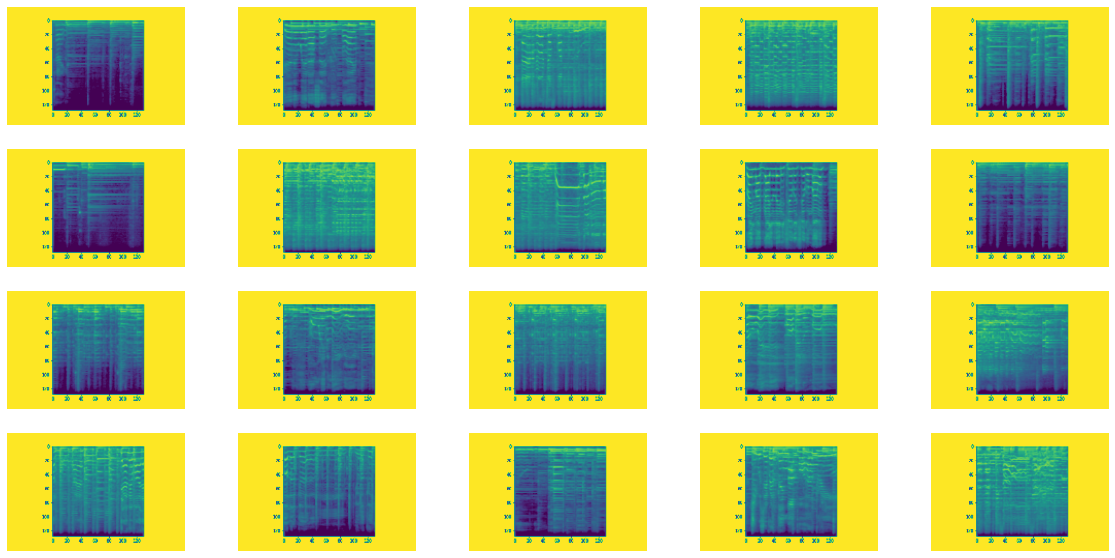

In [78]:
## Example spectrograms for one client
figure = plt.figure(figsize=(20, 10))
j = 0

for example in example_dataset.take(20):
  plt.subplot(4, 5, j+1)
  plt.imshow(example['pixels'].numpy())
  plt.axis('off')
  j += 1


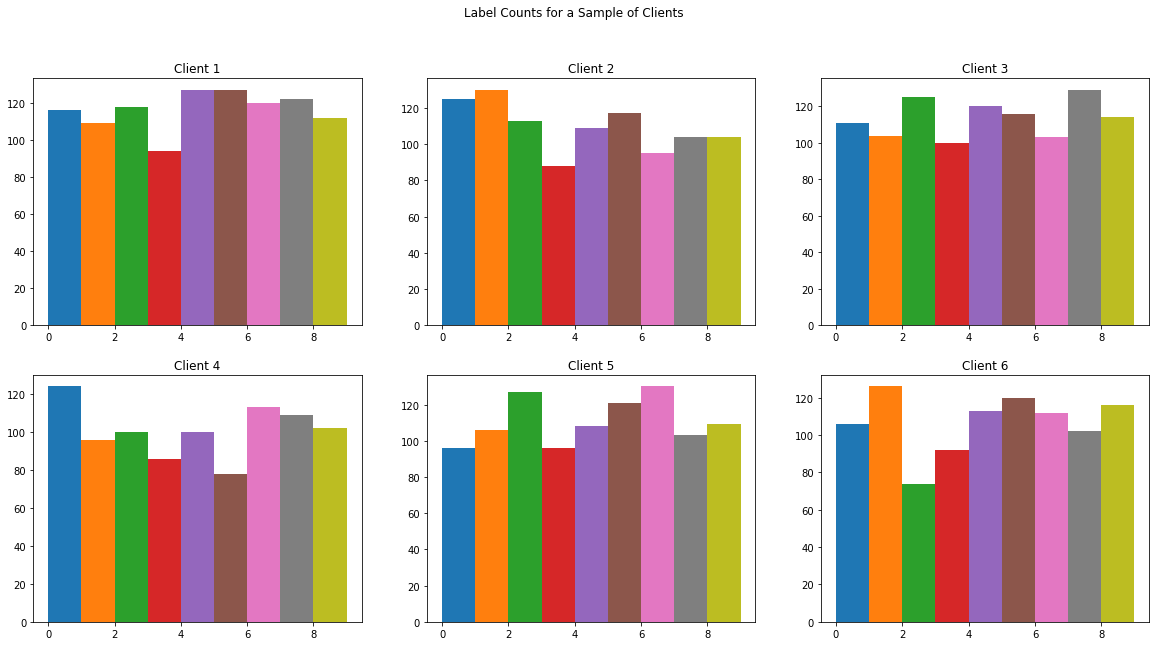

In [79]:
# Number of examples per layer for a sample of clients

import collections 

f = plt.figure(figsize=(20, 10))
f.suptitle('Label Counts for a Sample of Clients')
for i in train_client_ids:
  client_dataset = train_data.create_tf_dataset_for_client(i)

  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    # Append counts individually per label to make plots
    # more colorful instead of one color per plot.
    label = example['label_enc'].numpy()
    plot_data[label].append(label)
  plt.subplot(2, 3, i)
  plt.title('Client {}'.format(i))
  for j in range(10):
    plt.hist(
        plot_data[j],
        density=False,
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


### Average Spectrogram per client 

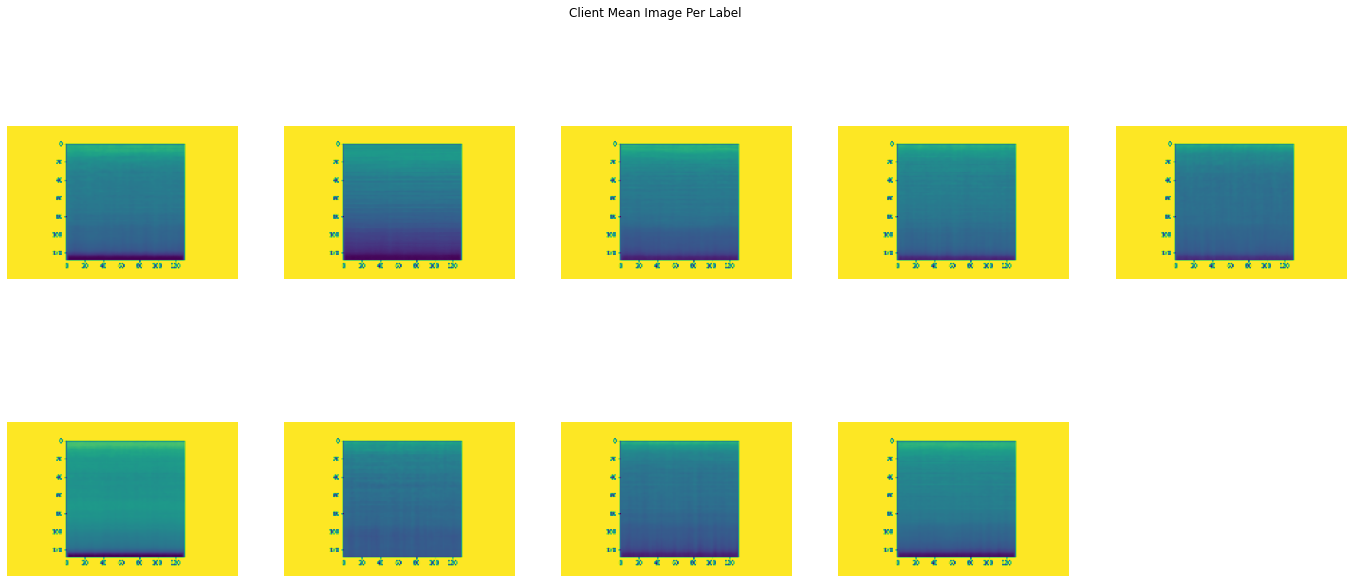

In [24]:
# Each client has different mean images, meaning each client will be nudging
# the model in their own directions locally.

import collections
client_dataset = train_data.create_tf_dataset_for_client(train_data.client_ids[5])
plot_data = collections.defaultdict(list)
for example in client_dataset:
    label = example['label_enc'].numpy()
    plot_data[label].append(example['pixels'].numpy())
    f = plt.figure(i, figsize=(24, 10))
    f.suptitle("Client Mean Image Per Label")
    
for j in range(9):
    mean_img = np.mean(plot_data[j], 0)
    plt.subplot(2, 5, j+1)
    plt.imshow(mean_img.reshape((115, 173)))
    plt.axis('off')

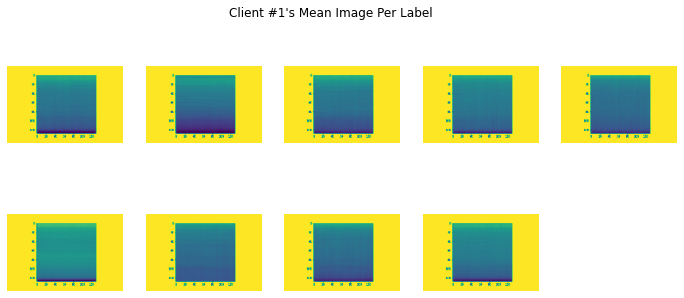

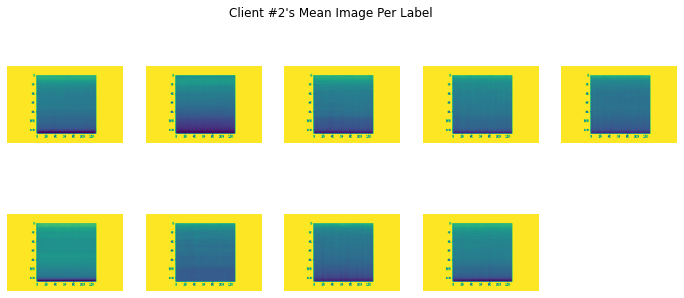

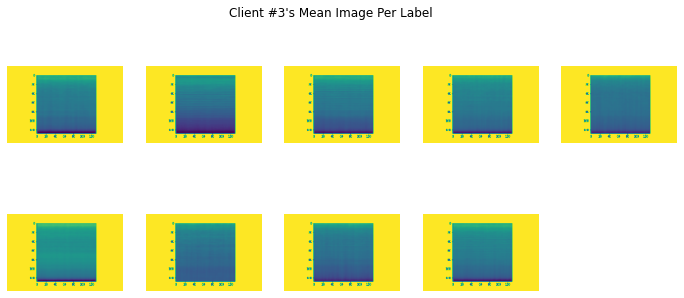

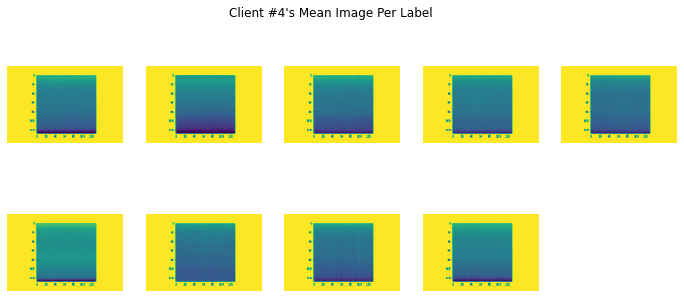

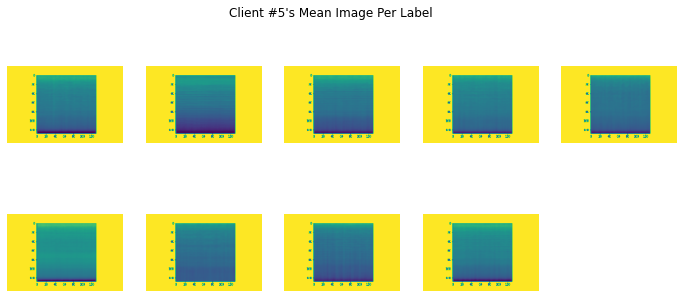

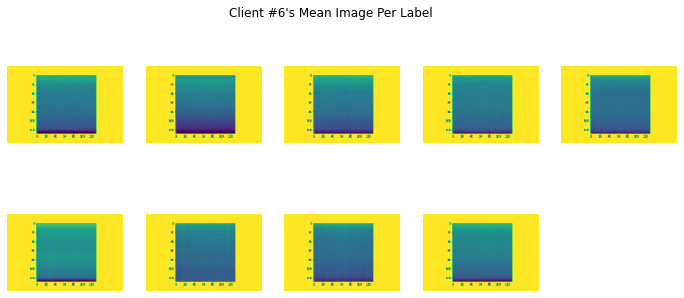

In [81]:
# Each client has different mean images, meaning each client will be nudging
# the model in their own directions locally.

for i in range(6):
  client_dataset = train_data.create_tf_dataset_for_client(train_data.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    label = example['label_enc'].numpy()
    plot_data[label].append(example['pixels'].numpy())
  f = plt.figure(i, figsize=(12, 5))
  f.suptitle("Client #{}'s Mean Image Per Label".format(i+1))
    
  for j in range(9):
    mean_img = np.mean(plot_data[j], 0)
    plt.subplot(2, 5, j+1)
    plt.imshow(mean_img.reshape((72, 108)))
    plt.axis('off')

### Preprocessing Input Data

In [18]:
NUM_EPOCHS = 7
BATCH_SIZE = 32
SHUFFLE_BUFFER = 7000
PREFETCH_BUFFER = 2

def preprocess(dataset):

  def batch_format_fn(element):
           
    return collections.OrderedDict(
        x=tf.reshape(element['pixels'], [-1, 288, 432, 1]),
        y=tf.reshape(element['label_enc'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)


In [19]:
import collections

# Checking if the above works

preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

In [34]:
preprocessed_example_dataset.element_spec

OrderedDict([('x',
              TensorSpec(shape=(None, 86, 130, 1), dtype=tf.float64, name=None)),
             ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])

In [35]:
# Since 5 batches
sample_batch['x'].shape

(32, 86, 130, 1)

In [85]:
sample_batch['y'].shape

(32, 1)

In [36]:
%reset_selective -f "^sample_batch$"

### Making Federated Data 

In [20]:
def make_federated_data(client_data, client_ids):
  return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [21]:
# Helper function to get random set of clients for each round

from random import randint 

def get_new_federated_data(client_data, NUM_CLIENTS):

    def get_clients_set(client_data):
        sample_clients = []
        for i in range(NUM_CLIENTS):
            idx = randint(0, len(client_data.client_ids)-1)
            while(client_data.client_ids[idx] in sample_clients):
                idx = randint(0, len(client_data.client_ids)-1)
            sample_clients.append(client_data.client_ids[idx])

        print('Picked random clients: ', sample_clients)
        return sample_clients
    
    sample_clients = get_clients_set(client_data)
    return make_federated_data(client_data, sample_clients)


## Creating Model With Keras

In [22]:
def make_model():
    initializer = tf.keras.initializers.he_normal(seed = 10) 
    
    model = tf.keras.Sequential([
        # Add Convo Layers here 
        tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu', input_shape = [288,432,1]),  
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2), 
        
        tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),  
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2), 
        
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),  
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),  
        
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),  
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),  
        
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),  
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),  
        
        
        # Add ANN here 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units = 9, activation= 'softmax', kernel_initializer= initializer)  # Output Layer 
    ])
    
    return model 

In [23]:
model = make_model() 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 143, 215, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 141, 213, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 106, 16)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 104, 32)       4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 52, 32)       0

In [24]:
# Adding TFF Model Wrapper 

def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
    
  keras_model = make_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
  )

### Centralized Architecture 

In [25]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [26]:
logdir = "/tmp/logs/scalars/training/"
summary_writer = tf.summary.create_file_writer(logdir)
state = iterative_process.initialize()

In [27]:
train_federated_data = get_new_federated_data(train_data,6)
test_federated_data = get_new_federated_data(test_data,3)

Picked random clients:  [3, 4, 1, 2, 6, 5]
Picked random clients:  [8, 9, 7]


In [36]:
%reset_selective -f "^df_fed$"

In [28]:
evaluation = tff.learning.build_federated_evaluation(model_fn)

In [29]:
NUM_ROUNDS = 7

with summary_writer.as_default():
    for round_num in range(1, NUM_ROUNDS):
        state, metrics = iterative_process.next(state,train_federated_data)
        print('round {:2d}, train accuracy={}'.format(round_num, metrics['train']['sparse_categorical_accuracy']))
        for name, value in metrics['train'].items():
            tf.summary.scalar(name, value, step=round_num)
        test_metric= evaluation(state.model, test_federated_data)
        print('testing accuracy:', test_metric['eval']['sparse_categorical_accuracy'])
        tf.summary.scalar('test_accuracy', test_metric['eval']['sparse_categorical_accuracy'], step = round_num)

    

round  1, train accuracy=0.29529157280921936
testing accuracy: 0.23716873
round  2, train accuracy=0.46897104382514954
testing accuracy: 0.5467964
round  3, train accuracy=0.6100050806999207
testing accuracy: 0.64407915
round  4, train accuracy=0.675004243850708
testing accuracy: 0.66957396
round  5, train accuracy=0.7239359021186829
testing accuracy: 0.6947333
round  6, train accuracy=0.7646515369415283
testing accuracy: 0.7178799


In [47]:
type(state)

tensorflow_federated.python.learning.framework.optimizer_utils.ServerState

In [30]:
import os

os.environ['TENSORBOARD_BINARY'] = '/users/ivygn/opt/miniconda3/envs/tff_env/bin/tensorboard'

In [31]:
%load_ext tensorboard

In [32]:
!ls {logdir}
%tensorboard --logdir {logdir} --port=0


events.out.tfevents.1655219825.Ivys-MacBook-Pro.local.894.0.v2


In [93]:
# Uncomment and run this cell to clean your directory of old output for
# future graphs from this directory. We don't run it by default so that if 
# you do a "Runtime > Run all" you don't lose your results.

!rm -R /tmp/logs/scalars/*


## Evaluation of Model (Test Data)

In [40]:
evaluation = tff.learning.build_federated_evaluation(model_fn)

In [47]:
test_metrics = evaluation(state.model,test_federated_data)
str(test_metrics)

"OrderedDict([('eval', OrderedDict([('sparse_categorical_accuracy', 0.7426676), ('loss', 1.0464439), ('num_examples', 20048), ('num_batches', 628)]))])"

In [ ]:
train_metrics = evaluation(state.model, get_new_federated_data(train_data, 6))
str(train_metrics)

In [48]:
model.save('Musicmodel')

INFO:tensorflow:Assets written to: Musicmodel/assets


INFO:tensorflow:Assets written to: Musicmodel/assets


In [47]:
model_2 =tf.keras.models.load_model('Musicmodel.keras')